# IMPORTING LIBRARIES

In [1]:
import sys
sys.path.append("../")
from helper_functions import *

c:\Users\Prash\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# DATA PREPARATION

## Importing Data

In [2]:
x_train = np.load("Data/xtrain.npy")
y_test = np.load("Data/ytest.npy")
x_test = np.load("Data/xtest.npy")
y_train = np.load("Data/ytrain.npy")

## Putting Data Together

In [3]:
x = np.vstack([x_train, x_test])
y = np.concatenate([y_train, y_test], axis=0)

## Class Weighting

In [4]:
from sklearn.utils import compute_class_weight

weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
weights = {index:value for index,value in enumerate(weights)}
weights

{0: 0.6519291273389634,
 1: 1.3608710680954026,
 2: 1.2602432778489117,
 3: 2.074835309617918,
 4: 0.6133831892186647,
 5: 1.5328012458633444,
 6: 2.309090909090909,
 7: 0.7755343248300994,
 8: 1.1202162469768104,
 9: 0.741012610577828,
 10: 0.8275354703100368}

# MODELLING

## Initial Modelling

In [15]:
models = {
  'Logistic Regression': LogisticRegression(),
  'Decision Tree': DecisionTreeClassifier(),
  'KNN': KNeighborsClassifier(),
  'SVC': SVC(),
  'AdaBoost': AdaBoostClassifier(),
  'Gradient Boosting': GradientBoostingClassifier(),
  'Random Forest': RandomForestClassifier(),
  'XGBoost': XGBClassifier(),
  'CatBoost': CatBoostClassifier(),
  'LightGBM': LGBMClassifier()
}

In [16]:
initial_models = Train_Classifiers(models=models, x=x, y=y)

In [17]:
initial_models.fit()

Training Logistic Regression
Logistic Regression Model Trained
Time taken = 1.969 seconds
------------------
Training Decision Tree
Decision Tree Model Trained
Time taken = 36.171 seconds
------------------
Training KNN
KNN Model Trained
Time taken = 0.008 seconds
------------------
Training SVC
SVC Model Trained
Time taken = 19.457 seconds
------------------
Training AdaBoost
AdaBoost Model Trained
Time taken = 204.104 seconds
------------------
Training Gradient Boosting
Gradient Boosting Model Trained
Time taken = 5363.409 seconds
------------------
Training Random Forest
Random Forest Model Trained
Time taken = 45.032 seconds
------------------
Training XGBoost
XGBoost Model Trained
Time taken = 268.669 seconds
------------------
Training CatBoost
Learning rate set to 0.086913
0:	learn: 2.2739625	total: 1.38s	remaining: 23m
1:	learn: 2.1979059	total: 2.79s	remaining: 23m 12s
2:	learn: 2.1244531	total: 4.22s	remaining: 23m 21s
3:	learn: 2.0567073	total: 5.68s	remaining: 23m 35s
4:	l

In [18]:
initial_models.score()

Logistic Regression: 0.6711111111111111
Decision Tree: 0.4006349206349206
KNN: 0.5765079365079365
SVC: 0.653968253968254
AdaBoost: 0.48063492063492064
Gradient Boosting: 0.6209523809523809
Random Forest: 0.6184126984126984
XGBoost: 0.6438095238095238
CatBoost: 0.6571428571428571
LightGBM: 0.6495238095238095


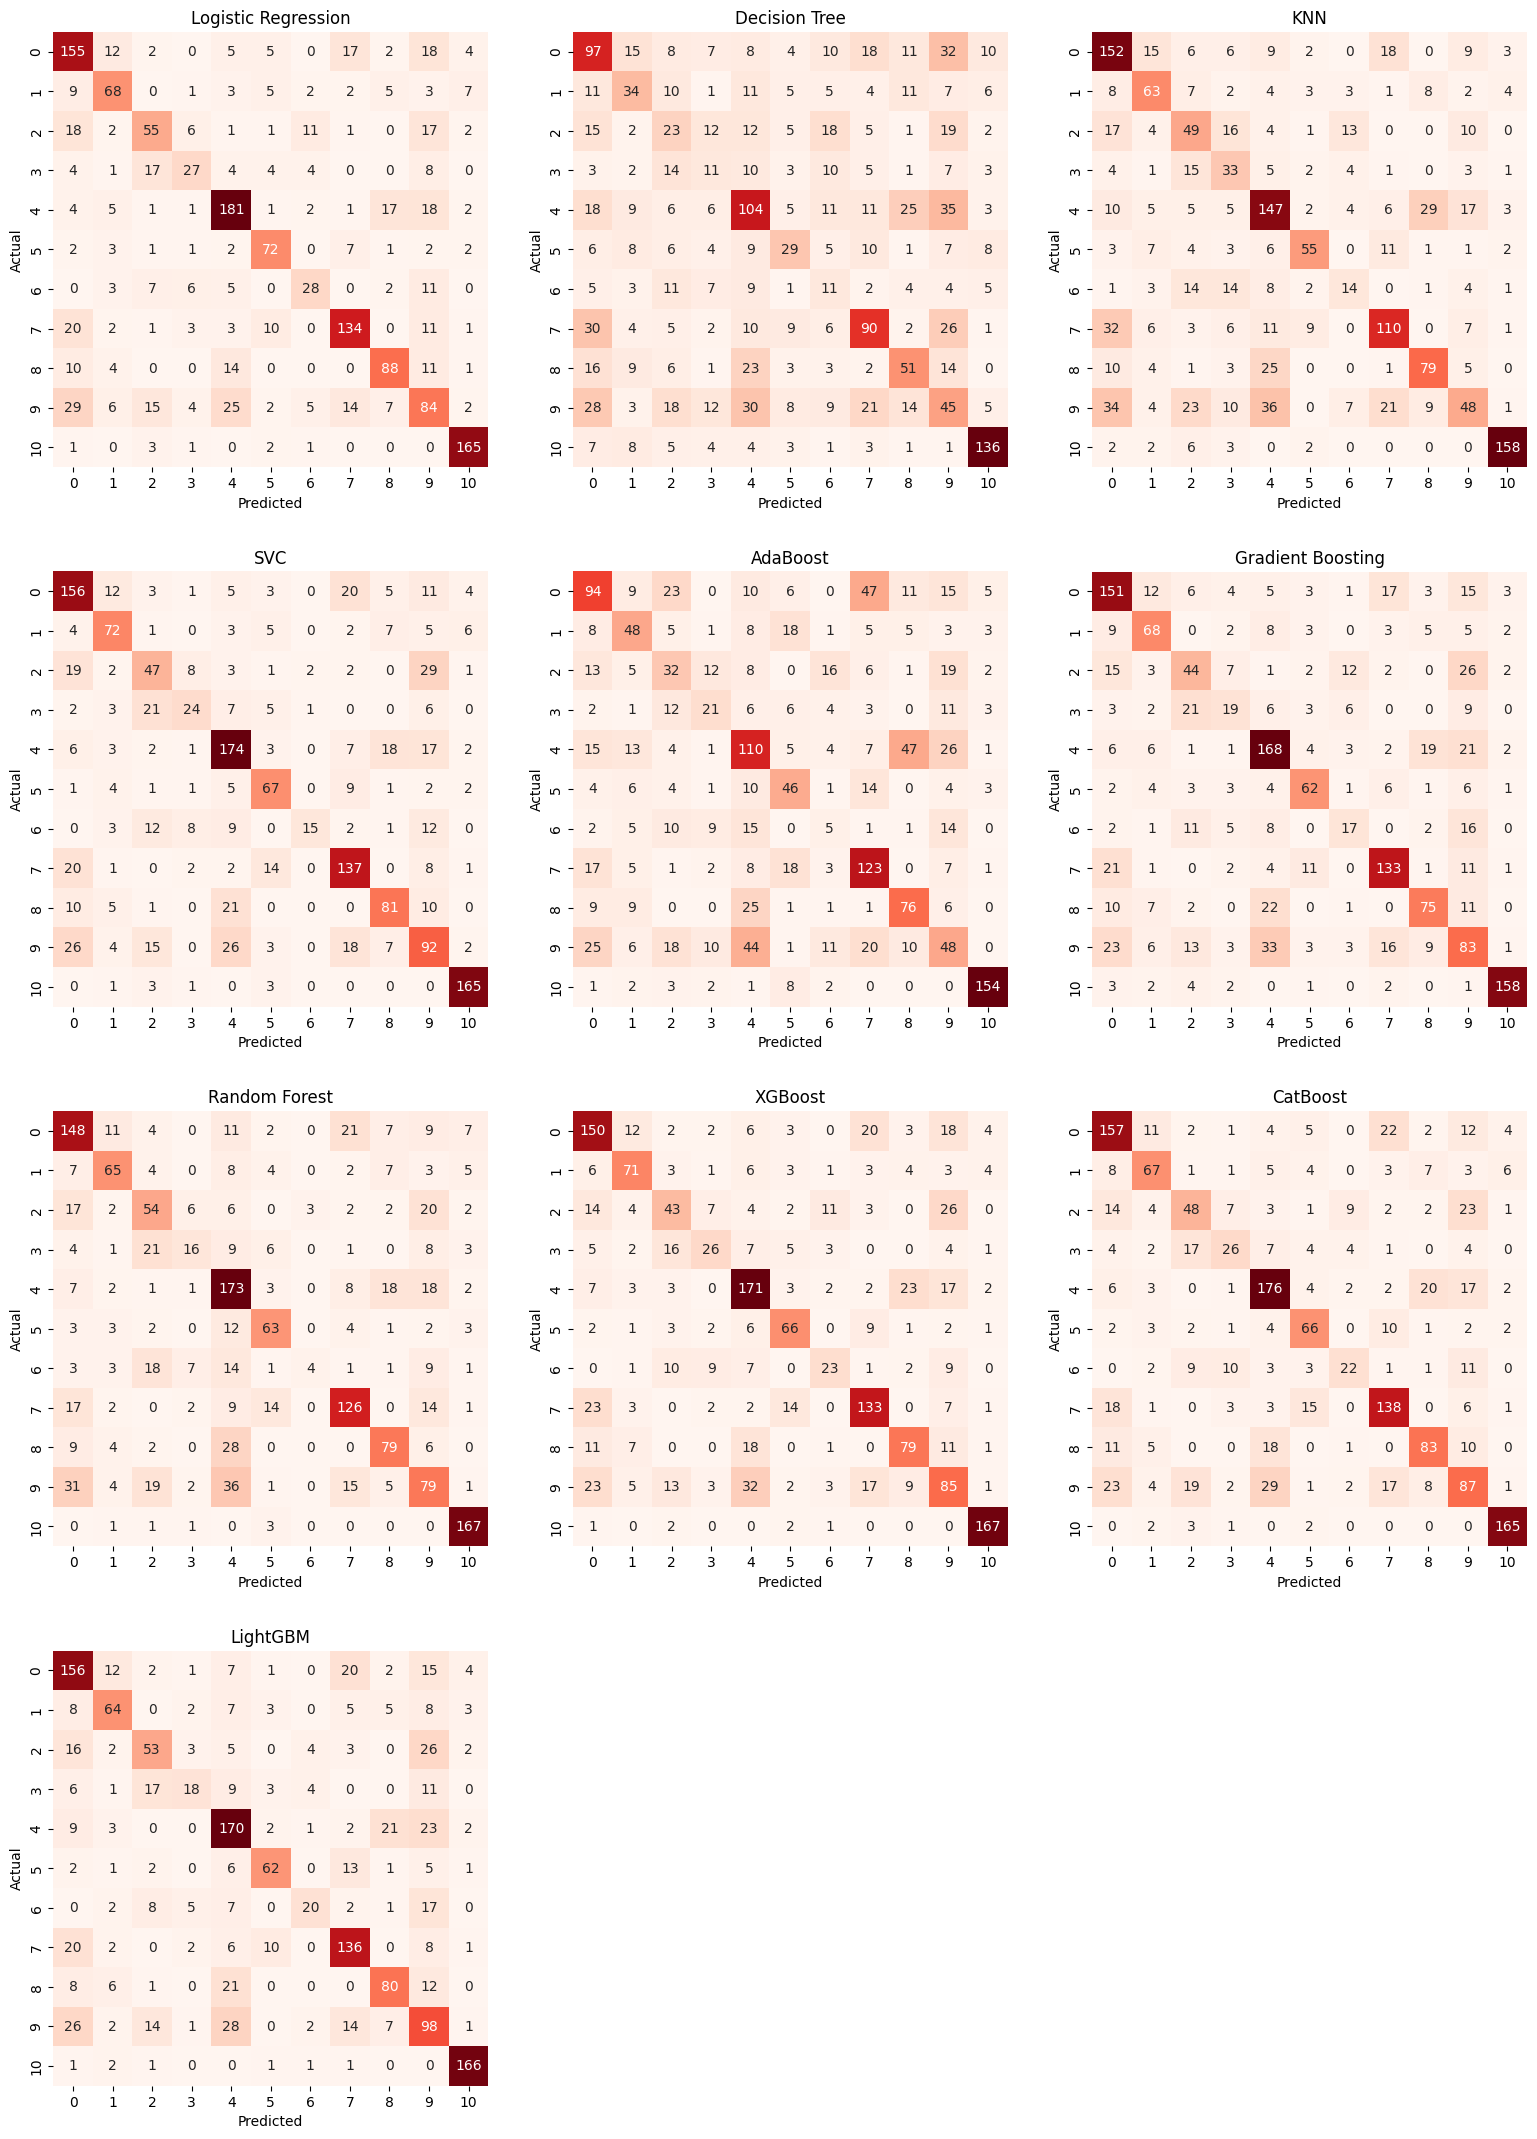

In [19]:
initial_models.Compare_ConfusionMatrices()

In [20]:
initial_performance = initial_models.Compare_Performance()
initial_performance.to_csv('Models/Initial/Unweighted/Performance.csv')
initial_performance

,Name,Accuracy,Precision_0,Precision_1,Precision_2,Precision_3,Precision_4,Precision_5,Precision_6,Precision_7,...,f1-score_1,f1-score_2,f1-score_3,f1-score_4,f1-score_5,f1-score_6,f1-score_7,f1-score_8,f1-score_9,f1-score_10
0,Logistic Regression,0.671,0.615,0.642,0.539,0.540,0.745,0.706,0.528,0.761,...,0.645,0.509,0.454,0.761,0.738,0.487,0.742,0.704,0.447,0.919
1,Decision Tree,0.401,0.411,0.351,0.205,0.164,0.452,0.387,0.124,0.526,...,0.337,0.204,0.162,0.449,0.345,0.146,0.506,0.408,0.231,0.773
2,KNN,0.577,0.557,0.553,0.368,0.327,0.576,0.705,0.311,0.651,...,0.575,0.397,0.388,0.602,0.643,0.262,0.621,0.620,0.321,0.911
3,SVC,0.654,0.639,0.655,0.443,0.522,0.682,0.644,0.833,0.695,...,0.670,0.427,0.417,0.713,0.680,0.375,0.717,0.653,0.478,0.927
4,AdaBoost,0.481,0.495,0.440,0.286,0.356,0.449,0.422,0.104,0.542,...,0.449,0.283,0.328,0.460,0.455,0.091,0.597,0.545,0.277,0.893
5,Gradient Boosting,0.621,0.616,0.607,0.419,0.396,0.649,0.674,0.386,0.735,...,0.627,0.402,0.325,0.683,0.670,0.321,0.727,0.617,0.418,0.921
6,Random Forest,0.618,0.602,0.663,0.429,0.457,0.565,0.649,0.571,0.700,...,0.640,0.450,0.308,0.642,0.663,0.116,0.690,0.637,0.438,0.915
7,XGBoost,0.644,0.620,0.651,0.453,0.500,0.660,0.660,0.511,0.707,...,0.664,0.411,0.430,0.695,0.684,0.430,0.713,0.635,0.453,0.941
8,CatBoost,0.657,0.646,0.644,0.475,0.491,0.698,0.629,0.550,0.704,...,0.641,0.447,0.426,0.726,0.667,0.431,0.724,0.659,0.473,0.930
9,LightGBM,0.650,0.619,0.660,0.541,0.562,0.639,0.756,0.625,0.694,...,0.634,0.500,0.356,0.681,0.709,0.426,0.714,0.653,0.471,0.941


In [ ]:
import joblib

for key, model in initial_models.get_trained_models().items():
    joblib.dump(model, f"Models/Initial/Unweighted/{key}.pk1")

## Using Class Weights

In [8]:
models = {
  'Logistic Regression': LogisticRegression(class_weight=weights),
  'Decision Tree': DecisionTreeClassifier(class_weight=weights),
  'SVC': SVC(class_weight=weights),
  'Random Forest': RandomForestClassifier(class_weight=weights),
  'CatBoost': CatBoostClassifier(class_weights=weights),
  'LightGBM': LGBMClassifier(class_weight=weights)
}

In [9]:
weighted_classifiers = Train_Classifiers(x,y,models)

In [10]:
weighted_classifiers.fit()

Training Logistic Regression
Logistic Regression Model Trained
Time taken = 1.884 seconds
------------------
Training Decision Tree
Decision Tree Model Trained
Time taken = 54.547 seconds
------------------
Training SVC
SVC Model Trained
Time taken = 14.301 seconds
------------------
Training Random Forest
Random Forest Model Trained
Time taken = 112.126 seconds
------------------
Training CatBoost
Learning rate set to 0.086913
0:	learn: 2.2921274	total: 2.45s	remaining: 40m 46s
1:	learn: 2.2179817	total: 4.63s	remaining: 38m 28s
2:	learn: 2.1549727	total: 6.74s	remaining: 37m 18s
3:	learn: 2.0923149	total: 8.86s	remaining: 36m 46s
4:	learn: 2.0415244	total: 11.1s	remaining: 36m 53s
5:	learn: 1.9892372	total: 12.4s	remaining: 34m 18s
6:	learn: 1.9366308	total: 13.7s	remaining: 32m 27s
7:	learn: 1.8860219	total: 15s	remaining: 31m 3s
8:	learn: 1.8441689	total: 16.3s	remaining: 29m 56s
9:	learn: 1.8015280	total: 17.7s	remaining: 29m 15s
10:	learn: 1.7652234	total: 19s	remaining: 28m 31s


In [11]:
weighted_classifiers.score()

Logistic Regression: 0.6463492063492063
Decision Tree: 0.3904761904761905
SVC: 0.6323809523809524
Random Forest: 0.6031746031746031
CatBoost: 0.6558730158730158
LightGBM: 0.6355555555555555


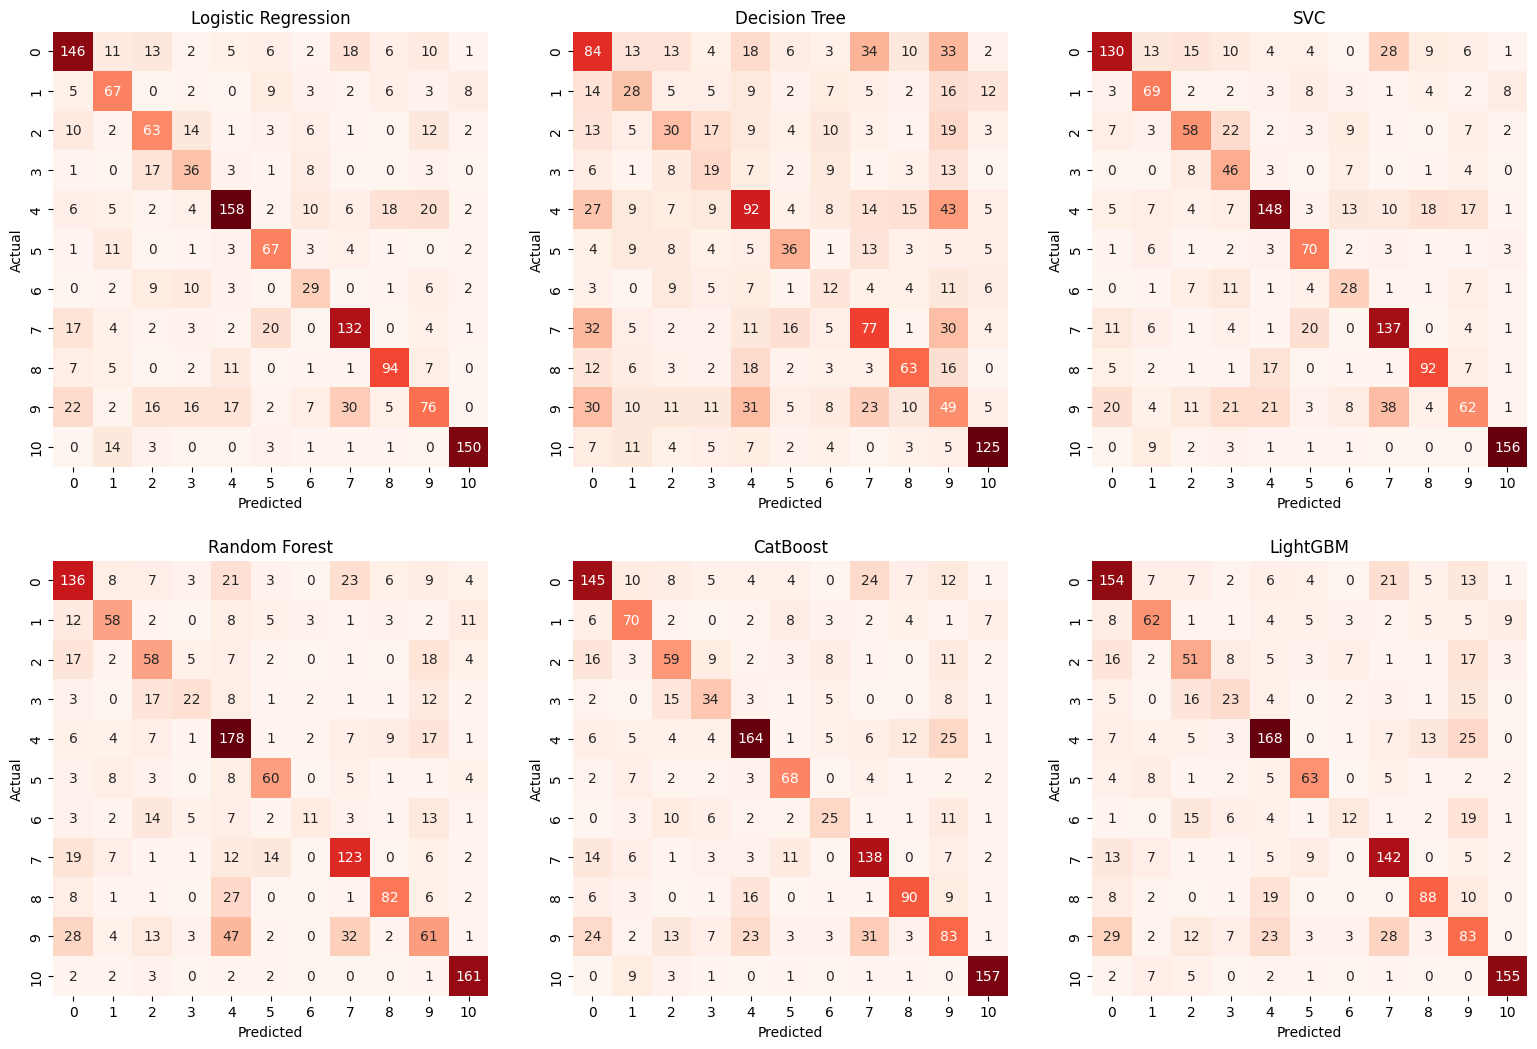

In [12]:
weighted_classifiers.Compare_ConfusionMatrices()

In [13]:
weighted_performance = weighted_classifiers.Compare_Performance()
weighted_performance.to_csv('Models/Initial/Weighted/Performance.csv')
weighted_performance

,Name,Accuracy,Precision_0,Precision_1,Precision_2,Precision_3,Precision_4,Precision_5,Precision_6,Precision_7,...,f1-score_1,f1-score_2,f1-score_3,f1-score_4,f1-score_5,f1-score_6,f1-score_7,f1-score_8,f1-score_9,f1-score_10
0,Logistic Regression,0.646,0.679,0.545,0.504,0.400,0.778,0.593,0.414,0.677,...,0.588,0.527,0.453,0.725,0.650,0.439,0.695,0.723,0.455,0.880
1,Decision Tree,0.390,0.362,0.289,0.300,0.229,0.430,0.450,0.171,0.435,...,0.277,0.280,0.250,0.412,0.416,0.182,0.425,0.519,0.226,0.735
2,SVC,0.632,0.714,0.575,0.527,0.357,0.725,0.603,0.389,0.623,...,0.613,0.518,0.465,0.677,0.670,0.418,0.677,0.713,0.400,0.897
3,Random Forest,0.603,0.574,0.604,0.460,0.550,0.548,0.652,0.611,0.624,...,0.577,0.483,0.404,0.638,0.649,0.275,0.644,0.704,0.360,0.880
4,CatBoost,0.656,0.656,0.593,0.504,0.472,0.739,0.667,0.500,0.660,...,0.628,0.511,0.482,0.721,0.697,0.446,0.701,0.729,0.459,0.900
5,LightGBM,0.636,0.623,0.614,0.447,0.426,0.686,0.708,0.429,0.673,...,0.602,0.447,0.374,0.703,0.692,0.267,0.717,0.713,0.429,0.896


In [14]:
import joblib

for key, model in weighted_classifiers.get_trained_models().items():
    joblib.dump(model, f"Models/Initial/Weighted/{key}.pk1")